In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import torch

In [9]:
file_path = "../slit_pore/"

number_of_timesteps = 700
Nx = 100
Ny = 100
Nc = 9

distribution_functions = np.zeros((number_of_timesteps, Nx, Ny, Nc))

for t in range(number_of_timesteps):
  f = np.loadtxt(file_path + "t_" + str(t) + "_f.txt")
  f = np.reshape(f, [Nx, Ny, Nc])
  distribution_functions[t, :, :] = f


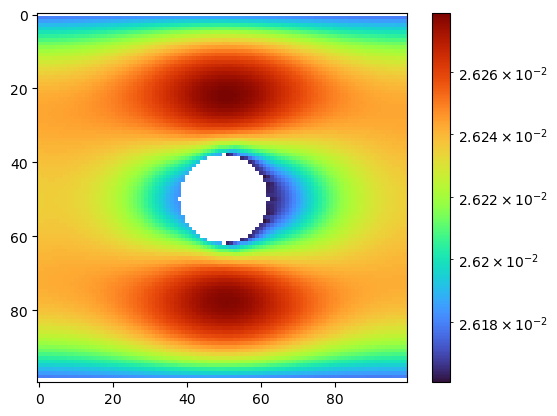

In [16]:
plt.figure()
plt.imshow(f[:, :, 1], cmap='turbo', norm=LogNorm())
plt.colorbar()
plt.show()

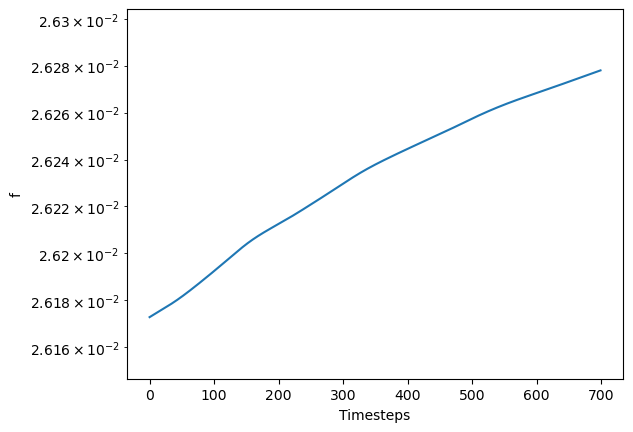

In [96]:
f_single_point_timeline = distribution_functions[:, 20, 50, 1]

plt.figure()
plt.plot(f_single_point_timeline)
plt.xlabel('Timesteps')
plt.ylabel('f')
plt.ylim([min(f_single_point_timeline) - min(f_single_point_timeline)/1000, max(f_single_point_timeline) + min(f_single_point_timeline)/1000])
plt.yscale('log')
plt.show()


In [101]:
N_points = 11  # number of samples
N_start = 0
N_end = N_start + N_points

L = number_of_timesteps # Total length of signal
h = L / N_points    # sampling interval

# time stamps
xj = torch.linspace(0, L - 1, N_points)

# signal
f_single_point_timeline = torch.tensor(distribution_functions[np.array(xj, dtype=int), 1, 1, 8], dtype = torch.float64)

# its FFT
F = torch.fft.fft(f_single_point_timeline, norm='forward')

In [102]:
Mu = np.floor(N_points / 2)  # upper bound of sum
Ml = np.ceil(N_points / 2) - 1  # lower bound of sum

SMa = torch.zeros((1, N_points))
xf = torch.linspace(0, L - 1, number_of_timesteps)

for m in range (-int(Ml), int(Mu)):
    
    k_m = 2*torch.pi * m / L

    # index of Fourier coefficient
    if m < 0:
        k = (N_points + m)
    else:
        k = m

    SMa = SMa + F[k] * torch.exp(1j * k_m * xj)

    print("m = ", m, " km = ", k_m, "Fourier Coeff = ", F[k].item())

SMa = torch.real(SMa)

m =  -5  km =  -0.04487989505128276 Fourier Coeff =  (-2.384673301688775e-07-6.063308338291625e-09j)
m =  -4  km =  -0.035903916041026204 Fourier Coeff =  (-2.191120626043425e-07-3.267141458500693e-08j)
m =  -3  km =  -0.026927937030769657 Fourier Coeff =  (-2.2281605185665903e-07-1.2731870818589065e-07j)
m =  -2  km =  -0.017951958020513102 Fourier Coeff =  (-2.514297188987043e-07-2.244448267780705e-07j)
m =  -1  km =  -0.008975979010256551 Fourier Coeff =  (-3.6652479467082103e-07-4.3541142852755493e-07j)
m =  0  km =  0.0 Fourier Coeff =  (0.006545820146558751+0j)
m =  1  km =  0.008975979010256551 Fourier Coeff =  (-3.6652479467082103e-07+4.3541142852755493e-07j)
m =  2  km =  0.017951958020513102 Fourier Coeff =  (-2.514297188987043e-07+2.244448267780705e-07j)
m =  3  km =  0.026927937030769657 Fourier Coeff =  (-2.2281605185665903e-07+1.2731870818589065e-07j)
m =  4  km =  0.035903916041026204 Fourier Coeff =  (-2.191120626043425e-07+3.267141458500693e-08j)


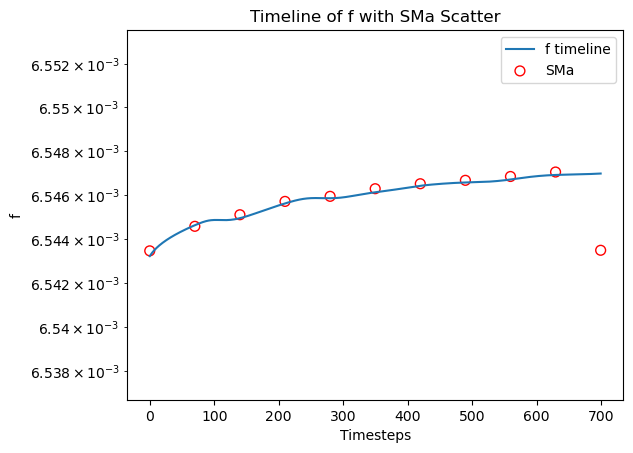

In [ ]:
f_single_point_timeline = distribution_functions[:, 1, 1, 8]

plt.figure()
plt.plot(xf, f_single_point_timeline, label='f')
plt.scatter(xj[:-1], SMa[:-1], edgecolors='red', facecolors='none', s=50, label='SMa')

plt.xlabel('Timesteps')
plt.ylabel('f')
plt.ylim([min(f_single_point_timeline) - min(f_single_point_timeline)/1000, max(f_single_point_timeline) + min(f_single_point_timeline)/1000])
plt.yscale('log')
plt.legend()
plt.title('Timeline of f with SMa Scatter')
plt.show()
